                                                                                                       בס״ד
# Parking Violations in New York City
### By: Sarina Kofman, Semester Project: Applied Machine Learning

# I. Defining the Problem
### Project Purpose:

This notebook seeks to answer the question, "As a law-abiding citizen (who is weary of receiving parking tickets) where in New York City should I park my car?". In other words, a user inputs his vehicle make and other identifiers, such as the general area where he wants to park and description of his car type, and wants to know whether or not his current area is a good place for him to park his car so that he doesn't receive a parking violation ticket. This product seeks to build a model that acts as a binary classifier, which predicts whether a person's current circumstance (identifying features and location) finds him in a favorable parking location, or whether it is unfavorable and he should go look for parking elsewhere (<i>lest he receive a ticket!</i>).

# II. Overview of Data and Exploratory Data Analysis
### This section includes some EDA to see which features might be important and better understand the data

Let us begin with collecting the data that we will be using to approach this problem and built this product. The following ["Parking Violations Issued - Fiscal Year 2022"](https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2022/pvqr-7yc4) dataset is New York City data of parking tickets issued in the fiscal year 2022. Let's take a look at the data!

In [1]:
import pandas as pd

# download dataset of parking violations and read it into dataframe
data = pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2022.csv')

/opt/tljh/user/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
original_data = data.copy() # make copy of original dataframe so that we can refer to it later if needed

pd.set_option('display.max_columns', None) # set Pandas to display all of the columns 
data                                       # Display a general summary of the dataframe

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1457617912,JEB5683,NY,PAS,06/25/2021,40,VAN,FORD,P,63430,69230,13490,20221004,88.0,88,88,967603,0088,0.0,0130A,0125A,K,O,100,NORTH PORTLAND AVE,NaN,0,408,C4,NaN,BBBBBBB,ALL,ALL,GY,0.0,2007,-,3,NaN,NaN,NaN,NaN,NaN
1,1457617924,JAN2986,NY,PAS,06/25/2021,20,SUBN,DODGE,P,13490,40404,40404,20221203,88.0,88,88,967603,0088,0.0,0225A,0215A,K,F,398,AUBURN PLACE,NaN,20210625,408,E2,NaN,BBBBBBB,ALL,ALL,BLU,0.0,2007,-,0,NaN,NaN,NaN,NaN,NaN
2,1457622427,FJH6630,TX,PAS,06/17/2021,98,SDN,AUDI,P,79430,47130,11750,0,88.0,88,88,969730,0088,0.0,0809P,NaN,K,F,170,SOUTH PORTLAND AVE,NaN,0,408,E2,NaN,BBBBBBB,ALL,ALL,WHITE,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1457638629,RD1Y5N,MO,PAS,06/16/2021,98,SDN,TOYOT,P,53130,23230,23930,0,83.0,83,83,944434,0083,0.0,0605P,NaN,K,F,22,JEFFERSON ST,NaN,0,408,C4,NaN,BBBBBBB,ALL,ALL,TAN,0.0,2001,-,0,NaN,NaN,NaN,NaN,NaN
4,1457639580,T503814C,NY,OMT,07/04/2021,40,TAXI,HONDA,P,81030,23930,40030,20210831,83.0,83,83,962452,0083,0.0,1058P,NaN,K,F,25,STANHOPE ST,NaN,0,408,F2,NaN,BBBBBBB,ALL,ALL,WHI,0.0,2020,-,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006005,8993130383,NY21,NY,PAS,09/22/2021,70,SUBN,TOYOT,T,26730,69230,63030,88888888,88.0,88,88,372229,T301,S,0552P,NaN,K,F,163,Classon Ave,NaN,0,408,J3,NaN,YYYYYYY,NaN,NaN,OTHER,NaN,0,NaN,0,06,70B-Impropr Dsply of Reg (NYS),NaN,NaN,NaN
4006006,8993130395,JJT4627,NY,PAS,09/22/2021,70,2DSD,BMW,T,63030,46630,74530,20210825,88.0,88,88,372229,T301,S,0610P,NaN,K,O,499,Myrtle Ave,NaN,0,408,J3,NaN,YYYYYYY,NaN,NaN,WH,NaN,1989,NaN,0,06,70A-Reg. Sticker Expired (NYS),NaN,NaN,NaN
4006007,8993130401,GGF6942,NY,PAS,09/22/2021,14,SUBN,FORD,T,63030,46630,74530,20220411,88.0,88,88,372229,T301,S,0615P,NaN,K,O,487,Myrtle Ave,NaN,0,408,C,NaN,YYYYYYY,NaN,NaN,BLUE,NaN,2005,NaN,0,06,14-No Standing,NaN,NaN,NaN
4006008,8993130413,HYX8783,NY,PAS,09/24/2021,38,SUBN,BMW,T,42730,26730,26830,20220529,79.0,79,79,372229,T301,S,0132P,NaN,K,F,1086,Fulton St,NaN,0,408,H1,NaN,YYYYYY,0800A,0700P,WH,NaN,2020,310832,0,09,38-Failure to Dsplay Meter Rec,NaN,NaN,NaN


We will now read in the engineered ["Open Parking and Camera Violations"](https://data.cityofnewyork.us/City-Government/Open-Parking-and-Camera-Violations/nc67-uf89) dataset, whose column `Violation Status` contains a 1 if the parking violation has been ruled as not guilty and a 0 if guilty. We will then merge this dataset with our above dataset, matching the columns on `Summons Number`, `Plate ID`, and `Issue Date`. (This way we can ensure that the parking violation cases from both datasets are indeed the same case.) 

In [3]:
# download dataset of parking violations status and read it into dataframe
statusDF = pd.read_csv('violation_status.csv')

original_statusDF = statusDF.copy() # make copy of original dataframe so that we can refer to it later if needed
statusDF # Display general summary of the dataframe

,Plate ID,Summons Number,Issue Date,Violation Status
0,Z84JNV,4.724985e+09,03/08/2021,0
1,81220MH,4.724985e+09,03/08/2021,0
2,T672719C,4.724986e+09,03/08/2021,0
3,HLX4818,4.724986e+09,03/08/2021,0
4,77645,8.936654e+09,05/25/2021,1
...,...,...,...,...
1161604,89328MJ,4.016558e+09,02/25/2021,0
1161605,A81FPT,4.016572e+09,02/26/2021,0
1161606,68570MN,4.016577e+09,02/26/2021,1
1161607,60736MG,4.016572e+09,02/26/2021,0


In [4]:
# merge datasets based on summons number, plate ID, and Issue Date (to ensure it's the same case)
data_merged = data.merge(statusDF, on = ['Summons Number', 'Plate ID', 'Issue Date'])
data_merged

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Violation Status
0,1457252740,12996PF,NY,COM,06/03/2021,78,TRA,INTER,P,63290,20440,20460,20220131,105.0,105,105,930305,0105,0.0,0253A,NaN,Q,F,111-10,SPRINGFIELD BLVD,NaN,0,408,K6,NaN,BBBBBBB,ALL,ALL,WH,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN,1
1,1473137111,W443075,NJ,PAS,07/21/2021,98,NaN,HONDA,P,38220,29687,44739,0,122.0,122,122,964761,0122,0.0,0440P,NaN,R,F,3,MARGARET ST,NaN,0,408,K6,NaN,BBBBBBB,ALL,ALL,NaN,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN,1
2,1473296274,1R30873A,AL,PAS,06/27/2021,35,DELV,NaN,P,10810,34470,34490,20211128,14.0,14,14,964828,0014,0.0,0123P,NaN,NY,F,500,8TH AVE,NaN,0,408,F2,NaN,BBBBBBB,ALL,ALL,NaN,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN,1
3,1473359843,1R30873A,AL,PAS,06/28/2021,31,NaN,NaN,P,10810,34470,34490,0,14.0,14,14,970146,0014,0.0,0617P,NaN,NY,F,500,8TH AVE,NaN,0,408,I3,NaN,BBBBBBB,ALL,ALL,GRN,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN,1
4,1479282200,LJW8192,PA,PAS,07/18/2021,17,SUBN,JEEP,P,0,0,0,0,33.0,33,0,356507,IRSE,0.0,1050A,NaN,NY,O,NaN,W/S EDGECOMBE AVE,S/S W 162,0,408,J6,NaN,BBBBBBY,1000A,0400P,WH,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285207,8993129927,70290JA,NY,COM,09/22/2021,14,VAN,FORD,T,58200,50920,42330,20220131,84.0,84,84,372229,T301,S,1007A,NaN,K,F,38,Main St,NaN,0,408,C,NaN,YYYYYYY,NaN,NaN,WH,NaN,2017,NaN,0,SPCL,14-No Standing,NaN,NaN,NaN,0
285208,8993130103,WESTAZE,NY,SRF,09/22/2021,38,4DSD,TESLA,T,73220,0,0,20220314,84.0,84,84,372229,T301,S,1156A,NaN,K,I,S,Remsen St,25ft E/of Clinton St,0,408,H1,NaN,YYYYYY,0900A,0700P,GY,NaN,2020,342741,0,SPCL,38-Failure to Dsplay Meter Rec,NaN,NaN,NaN,1
285209,8993130188,T780599C,NY,OMT,09/22/2021,14,SUBN,TOYOT,T,27030,42730,13430,20220731,88.0,88,88,372229,T301,S,0209P,NaN,K,O,475,Clermont Ave,NaN,0,408,C,NaN,YYYYYYY,NaN,NaN,RD,NaN,0,NaN,0,06,14-No Standing,NaN,NaN,NaN,0
285210,8993130231,KJW7447,NY,PAS,09/22/2021,74,SUBN,FORD,T,41630,54130,47130,20230614,88.0,88,88,372229,T301,S,0243P,NaN,K,F,136,Fort Greene Pl,NaN,0,408,J2,NaN,YYYYYYY,NaN,NaN,BK,NaN,2007,NaN,0,06,74-Missing Display Plate,NaN,NaN,NaN,0


Now that we have a column in our merged dataset called `Violation Status` where the label 1 means innocent and the label 0 means guilty, we can use it as our target vector!

In [5]:
# list of potential features and their meaning
print(data_merged.columns)
features = pd.read_csv("ParkingFeatures.csv")
features

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation', 'Violation Status'],
      dty

,Source Column Name,Description/Comment
0,SUMMONS-NUMBER,UNIQUE IDENTIFIER OF SUMMONS
1,PLATE ID,REGISTERED PLATE ID
2,REGISTRATION STATE,STATE OF PLATE REGISTRATION
3,PLATE TYPE,TYPE OF PLATE
4,ISSUE-DATE,ISSUE DATE
5,VIOLATION-CODE,TYPE OF VIOLATION
6,SUMM-VEH-BODY,"VEHICLE BODY TYPE WRITTEN ON SUMMONS (SEDAN, E..."
7,SUMM-VEH-MAKE,MAKE OF CAR WRITTEN ON SUMMONS
8,ISSUING-AGENCY,ISSUING AGENCY CODE
9,STREET-CODE1,GEOGRAPHICAL STREET CODE


This original dataset has 43 columns, which are all possible features that our model can use to predict the label. However, we only want to keep the features which might have significance with regard to this specific product. That is, we need to determine which features are important in terms of helping predict if a location is a good place to park (1) or not a good place to park (0). For example, it is unlikely that inputting the Plate ID of a particular user will help us predict whether or not the area is a favorable place to park (i.e. the likelihood of the user receiving a parking ticket in this location is relatively low). Additionally, we will check if any of the columns contain blanks (null values). If there are enough null values in a given column, it might make sense to drop the column altogether from our feature matrix.

In [6]:
# get a summary of size and types of dataset
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285212 entries, 0 to 285211
Data columns (total 44 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Summons Number                     285212 non-null  int64  
 1   Plate ID                           285212 non-null  object 
 2   Registration State                 285212 non-null  object 
 3   Plate Type                         285212 non-null  object 
 4   Issue Date                         285212 non-null  object 
 5   Violation Code                     285212 non-null  int64  
 6   Vehicle Body Type                  285158 non-null  object 
 7   Vehicle Make                       285204 non-null  object 
 8   Issuing Agency                     285212 non-null  object 
 9   Street Code1                       285212 non-null  int64  
 10  Street Code2                       285212 non-null  int64  
 11  Street Code3                       2852

In [7]:
# check number of null values in each column
data_merged.isnull().sum()

Summons Number                            0
Plate ID                                  0
Registration State                        0
Plate Type                                0
Issue Date                                0
Violation Code                            0
Vehicle Body Type                        54
Vehicle Make                              8
Issuing Agency                            0
Street Code1                              0
Street Code2                              0
Street Code3                              0
Vehicle Expiration Date                   0
Violation Location                     7574
Violation Precinct                        0
Issuer Precinct                           0
Issuer Code                               0
Issuer Command                         7573
Issuer Squad                           7650
Violation Time                            0
Time First Observed                  272664
Violation County                         21
Violation In Front Of Or Opposit

In [8]:
# display summary of numerical features
data_merged.describe()

,Summons Number,Violation Code,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Date First Observed,Law Section,Unregistered Vehicle?,Vehicle Year,Feet From Curb,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Violation Status
count,2.852120e+05,285212.000000,285212.000000,285212.000000,285212.000000,2.852120e+05,277638.000000,285212.000000,285212.000000,285212.000000,2.852120e+05,285212.000000,147.0,285212.000000,285212.000000,0.0,0.0,0.0,285212.000000
mean,8.804917e+09,39.423976,26808.866741,20989.827065,21343.042744,3.560491e+07,46.784777,45.542375,45.594505,353920.740540,3.089601e+05,427.862569,0.0,1568.555748,0.106875,NaN,NaN,NaN,0.178096
std,6.829729e+08,21.623406,19281.632170,19551.237215,19643.914313,2.945795e+07,39.879124,40.058629,40.759265,60318.927807,2.479697e+06,120.383021,0.0,836.067796,0.776766,NaN,NaN,NaN,0.382594
min,1.292718e+09,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000e+00,408.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,8.894910e+09,20.000000,11710.000000,8920.000000,8980.000000,2.021889e+07,14.000000,14.000000,14.000000,358194.000000,0.000000e+00,408.000000,0.0,2003.000000,0.000000,NaN,NaN,NaN,0.000000
50%,8.925022e+09,38.000000,21740.000000,17170.000000,17430.000000,2.022083e+07,24.000000,24.000000,24.000000,365332.000000,0.000000e+00,408.000000,0.0,2013.000000,0.000000,NaN,NaN,NaN,0.000000
75%,8.951142e+09,53.000000,34870.000000,31190.000000,31990.000000,2.023073e+07,84.000000,84.000000,84.000000,369609.000000,0.000000e+00,408.000000,0.0,2018.000000,0.000000,NaN,NaN,NaN,0.000000
max,8.999701e+09,98.000000,97890.000000,98100.000000,98280.000000,8.888889e+07,123.000000,123.000000,977.000000,970740.000000,2.021093e+07,1180.000000,0.0,2068.000000,13.000000,NaN,NaN,NaN,1.000000


We now further explore our dataset to build familiarity with our data and inspect the potential features. 

In [9]:
object_data = data_merged.select_dtypes(include=["object"])    # look at columns that don't have numeric values

In [10]:
#object_data.head()
object_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285212 entries, 0 to 285211
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Plate ID                           285212 non-null  object
 1   Registration State                 285212 non-null  object
 2   Plate Type                         285212 non-null  object
 3   Issue Date                         285212 non-null  object
 4   Vehicle Body Type                  285158 non-null  object
 5   Vehicle Make                       285204 non-null  object
 6   Issuing Agency                     285212 non-null  object
 7   Issuer Command                     277639 non-null  object
 8   Issuer Squad                       277562 non-null  object
 9   Violation Time                     285212 non-null  object
 10  Time First Observed                12548 non-null   object
 11  Violation County                   285191 non-null  

Through viewing the types of the features, we see that 25/44 columns are non-numeric, which is more than half of our potential features. There seems to be repeating values in some of the columns. Let's see, for example, the number of distinct values in `Violation County`.

### Features Relating to Location:
#### Violation Precinct:

In [11]:
# see unique values for Violation Precinct
data_merged["Violation Precinct"].unique()

array([105, 122,  14,  33,   1,  70,  19, 108, 115,  43,  90,  60,  63,
        81,  67, 104,  62,  71,  32,  88,  44,  72,  78,  47,  73,  50,
        66,  49,  94,  79,   0, 109, 114, 110,  42,  52,  40,  48,  17,
       112, 106, 103,  13, 102,  23, 101,  25,  34,   9,   6, 121, 120,
        46, 107, 111,  76, 100,  68,   7, 113, 123,  61,  75,  30,  28,
        69,  84,  26,  18,   5,  41,  10,  24,  77,  83,  20,  45,  22])

In [12]:
# drop all rows in dataset whose precinct is 0 (Precinct 0 does not exist in NYC)
data_merged = data_merged[data_merged["Violation Precinct"] != 0]

<AxesSubplot:ylabel='Frequency'>

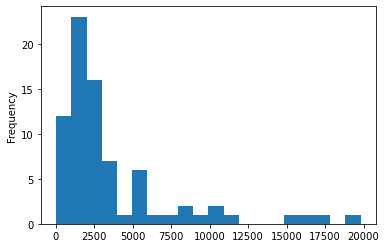

In [13]:
# check how many parking tickets per Violation Precinct
precinctDF = data_merged.groupby(["Violation Precinct"]).count() # count gives num of non-null elements

# plot the count of parking tickets per precinct with x axis as number of counts. 
# Frequency (y axis) is number of precincts that had within that range of counts.
precinctDF["Summons Number"].plot.hist(bins=20)

#### Violation County:

In [14]:
# see number of unique values for Violation Counties
data_merged["Violation County"].nunique()                       

8

There are seemingly 8 possibilities for the county in which the person received the parking ticket, so this is categorical data. We change the type from "object" to "category" in order to make it a numerical data type, as this can help with Pandas processing. As part of feature engineering, we will also change the `Issue Date` column from type "object" to type "datetime" in order to make it easier to handle.

We must examine what these 8 counties are, as we know that New York City is comprised only of 5 boroughs. Perhaps there are multiple references to the same borough.

In [15]:
data_merged["Violation County"].unique()

array(['Q', 'R', 'NY', 'BX', 'K', 'Qns', 'Kings', 'Bronx', nan],
      dtype=object)

In [16]:
data_merged["Violation County"].isnull().sum()

18

In [17]:
# drop rows with "nan" values 
data_merged = data_merged.dropna(subset=['Violation County'])

In [18]:
# group all counties to 5 boroughs (ex: "BX" and "Bronx" are really the same county!)

# group Bronx as BX
data_merged.loc[(data_merged['Violation County'] == "Bronx"), 'Violation County'] = "BX" 

# group Brooklyn as BK
data_merged.loc[(data_merged['Violation County'] == "Kings") |
                (data_merged['Violation County'] == "K"), 'Violation County'] = "BK" 

# group Queens as QN
data_merged.loc[(data_merged['Violation County'] == "Qns") |
                (data_merged['Violation County'] == "Q"), 'Violation County'] = "QN" 

# group Manhattan as MN
data_merged.loc[(data_merged['Violation County'] == "NY"), 'Violation County'] = "MN"

# group Staten Island as ST
data_merged.loc[(data_merged['Violation County'] == "R") |
                (data_merged['Violation County'] == "RICH") |
                (data_merged['Violation County'] == "RICHM") |
                (data_merged['Violation County'] == "Rich"), 'Violation County'] = "ST" 

In [19]:
# replace strings with numbers
data_merged["Violation County"] = data_merged["Violation County"].astype("category")

print("Data type of Violation County:", data_merged["Violation County"].dtype)
print(data_merged["Violation County"].cat.categories)

Data type of Violation County: category
Index(['BK', 'BX', 'MN', 'QN', 'ST'], dtype='object')


### Features Relating to Time:

#### Issue Date:

In [20]:
# convert date object into datetime object
data_merged["Issue Date"] = pd.to_datetime(data_merged["Issue Date"])
print("Data type of Issue Date:", data_merged["Issue Date"].dtype) 

data_merged["Issue Date"].describe(datetime_is_numeric=True)  # display summary of our engineered feature

Data type of Issue Date: datetime64[ns]


count                           277620
mean     2021-08-12 20:16:05.083207424
min                2021-06-03 00:00:00
25%                2021-07-22 00:00:00
50%                2021-08-13 00:00:00
75%                2021-09-03 00:00:00
max                2021-09-27 00:00:00
Name: Issue Date, dtype: object

In [21]:
# extract issue month from issue date
data_merged["Issue Month"] = data_merged["Issue Date"].dt.month

# extract day of week from issue date (Monday=0, Sunday=6)
data_merged["Issue Day of Week"] = data_merged["Issue Date"].dt.dayofweek

#### Violation Time:

In [22]:
# transform Violation Time into a usable feature 
timeList = []

for time in data_merged["Violation Time"]:
    if len(str(time)) == 5:
        time = time[:2] + ':' + time[2:]
        timeList.append(pd.to_datetime(time, errors='coerce'))
    else:
        timeList.append(pd.NaT)

In [23]:
# extract hour from TimeStamp object
hour = []
for i in range(len(timeList)):
    hour.append(timeList[i].hour)

data_merged["Hour"] = hour 

In [24]:
# fill null values with median 
data_merged["Hour"] = data_merged["Hour"].fillna(data_merged["Hour"].median()) 

In [25]:
data_merged["Hour"].isnull().sum()

0

In [26]:
data_merged.select_dtypes(include=["object"]).nunique()  # count number of unique values per column

Plate ID                             121989
Registration State                       58
Plate Type                               54
Vehicle Body Type                        48
Vehicle Make                            131
Issuing Agency                            6
Issuer Command                          129
Issuer Squad                             47
Violation Time                         1413
Time First Observed                    1039
Violation In Front Of Or Opposite         5
House Number                          15912
Street Name                            4835
Intersecting Street                   25256
Sub Division                             71
Violation Legal Code                      0
Days Parking In Effect                   65
From Hours In Effect                     43
To Hours In Effect                       44
Vehicle Color                            81
Meter Number                          10295
Violation Post Code                     394
Violation Description           

It doesn't seem as though any of the other features that are of type "object" can fit nicely into categorical data. While features such as `Violation Legal Code`, `Violation In Front or Opposite`, `Issuing Agency`, and `Issuer Squad` do indeed seem categorical, it is doubtful that these features are important in relation to what this model will predict; that is, whether or not a certain place is a good area in which to park. 

### Features Relating to Identification:

#### Vehicle Make:  

Is `Vehicle Make` something that matters for our model? Is this an important feature?

In [27]:
data_merged['Vehicle Make'].describe()

count     277615
unique       131
top         FORD
freq       45013
Name: Vehicle Make, dtype: object

In [28]:
data_merged["Vehicle Make"]

0         INTER
1         HONDA
2           NaN
3           NaN
4          JEEP
          ...  
285207     FORD
285208    TESLA
285209    TOYOT
285210     FORD
285211    NISSA
Name: Vehicle Make, Length: 277620, dtype: object

<AxesSubplot:ylabel='Frequency'>

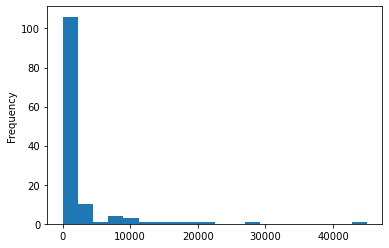

In [29]:
# check how many parking tickets per vehicle make
vehicleDF = data_merged.groupby(['Vehicle Make']).count() # count gives num of non-null elements 
vehicleDF["Summons Number"].plot.hist(bins=20)

The vast majority of vehicle types has very low frequency.

In [30]:
vehicleDF["Summons Number"].sort_values()

Vehicle Make
ZEUN         1
LANC         1
LOTUS        1
UNKNO        1
MO/V         1
         ...  
TOYOT    17915
HONDA    19945
CHEVR    20402
FRUEH    28715
FORD     45013
Name: Summons Number, Length: 131, dtype: int64

We can suggest that a FORD and HONDA simply have high counts because they are the top two most popular car types in New York City. Perhaps the `Vehicle Body Type`, however, is a more telling feature. Let's explore this possibility!

#### Vehicle Body Type:

In [31]:
data_merged["Vehicle Body Type"].unique()

array(['TRA', nan, 'DELV', 'SUBN', 'VAN', 'SDN', 'FOUR', '4DSD', 'TOW',
       '2DSD', 'TRAC', 'PICK', 'MCY', 'TAXI', 'SEDN', 'UTIL', 'MOPD',
       'TRLR', 'DUMP', 'CONV', 'REFG', 'TR/C', 'FLAT', 'LIM', 'MCC',
       'TANK', 'MOBL', 'BUS', 'SEMI', 'N/S', 'BOAT', 'RD/S', 'T/CR',
       'P/SH', 'POLE', 'STAK', 'TR/E', 'SWT', 'CUST', 'LTRL', 'R/RD',
       'H/WH', 'SUV', 'P-U', 'RV', 'ATV', 'TRAV', 'FPM', 'WSR'],
      dtype=object)

In [32]:
# drop rows with "nan" values 
data_merged = data_merged.dropna(subset=['Vehicle Body Type'])

In [33]:
data_merged["Vehicle Body Type"].describe()

count     277609
unique        48
top          VAN
freq       86483
Name: Vehicle Body Type, dtype: object

In [34]:
data_merged["Vehicle Body Type"]

0          TRA
2         DELV
4         SUBN
5         DELV
6          VAN
          ... 
285207     VAN
285208    4DSD
285209    SUBN
285210    SUBN
285211    SUBN
Name: Vehicle Body Type, Length: 277609, dtype: object

<AxesSubplot:ylabel='Frequency'>

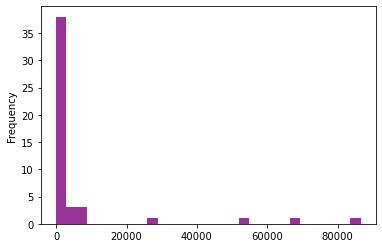

In [35]:
# check how many parking tickets per Vehicle Body Type
vehicleTypeDF = data_merged.groupby(['Vehicle Body Type']).count() # count gives num of non-null elements 
vehicleTypeDF["Summons Number"].plot.hist(bins=30, color="purple", alpha=0.8)

In [36]:
vehicleTypeDF["Summons Number"].sort_values()

Vehicle Body Type
WSR         1
TRA         1
ATV         1
SUV         1
RV          1
RD/S        1
R/RD        1
FPM         1
LTRL        2
FOUR        2
POLE        2
P/SH        3
TRAV        5
P-U         5
H/WH        8
SEMI       11
TANK       11
TR/E       12
CUST       13
SWT        17
T/CR       19
TOW        22
LIM        23
BOAT       35
MCC        36
N/S        42
SDN        57
STAK      100
BUS       134
MOBL      140
TR/C      217
TAXI      287
SEDN      300
DUMP      312
TRLR      403
FLAT      688
CONV      837
UTIL     2687
MCY      3632
TRAC     4328
2DSD     4502
REFG     7363
PICK     7584
MOPD     8423
DELV    27690
4DSD    52546
SUBN    68620
VAN     86483
Name: Summons Number, dtype: int64

<AxesSubplot:xlabel='Vehicle Body Type'>

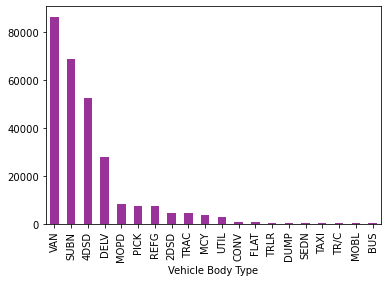

In [37]:
# plot bar graph of top 20 vehicle body types
top_20_types = vehicleTypeDF["Summons Number"].sort_values(ascending=False).head(20)
top_20_types.plot.bar(color="purple", alpha=0.8)

It seems as though there is enough variety among the top 20 vehicle body types that this could be an important feature to include in our model.

#### Registration State:

In [38]:
print(data_merged["Registration State"].unique()) # see all unique values

# drop rows with 99 as Registration State
data_merged = data_merged[data_merged["Registration State"] != '99']

['NY' 'AL' 'PA' 'IL' 'AZ' 'NJ' 'CT' 'NC' 'VA' 'IN' 'TX' 'OR' 'DE' 'WI'
 'MA' 'DP' 'FL' 'SC' 'OK' '99' 'CO' 'MD' 'NM' 'RI' 'WA' 'GA' 'NH' 'TN'
 'CA' 'MI' 'OH' 'ON' 'ME' 'VT' 'MO' 'SD' 'MN' 'LA' 'MS' 'WV' 'WY' 'MT'
 'DC' 'KS' 'KY' 'NV' 'ID' 'NE' 'AR' 'UT' 'QB' 'IA' 'HI' 'ND' 'AK' 'AB'
 'PR' 'GV']


<AxesSubplot:ylabel='Frequency'>

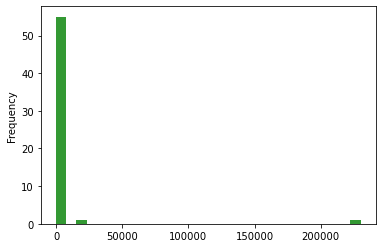

In [39]:
# check how many parking tickets per Registration State 
RegStateDF = data_merged.groupby(['Registration State']).count() # count gives num of non-null elements 
RegStateDF["Summons Number"].plot.hist(bins=30, color="green", alpha=0.8)

In [40]:
RegStateDF["Summons Number"].sort_values()

Registration State
PR         2
HI         2
AB         4
ID         5
WY         6
AK         6
GV         7
ND         9
MT        12
NM        12
NE        16
KS        22
QB        22
AR        23
MS        24
UT        24
WV        27
IA        31
SD        32
DC        35
NV        40
KY        55
ON        58
MN        59
LA        62
CO        70
OR        83
DP        98
ME       102
MO       104
WA       120
VT       127
AL       136
NH       136
RI       136
DE       145
MI       168
TN       229
SC       278
AZ       330
IL       386
OH       413
CA       439
GA       490
OK       608
TX       722
NC       821
MD       864
VA       893
WI       918
MA      1161
CT      2288
FL      2544
PA      4104
IN      5499
NJ     22412
NY    230182
Name: Summons Number, dtype: int64

From first glance, it seems like New Yorkers get the most tickets in NYC and those from New Jersey get the second to most. This makes sense, as the locals are the ones who are driving in their city the most. We can include this as a feature.

In [41]:
# Is this Registration State "NY" or not? 
data_merged["isNY"] = (data_merged["Registration State"] == "NY")

#### Plate Type:

In [42]:
print(data_merged["Plate Type"].unique()) # see all values 

# drop rows with 999 as Plate Type
data_merged = data_merged[data_merged["Plate Type"] != '999']

['COM' 'PAS' 'OMT' 'ORG' 'TOW' 'SRF' 'RGL' '999' 'MOT' 'APP' 'LMB' 'MED'
 'SPO' 'HIS' 'ITP' 'OML' 'DLR' 'OMS' 'TRC' 'AGC' 'TRA' 'AMB' 'CMB' 'PHS'
 'MCL' 'SRN' 'OMR' 'ORC' 'TRL' 'SPC' 'MCD' 'CHC' 'LMA' 'IRP' 'LMC' 'VAS'
 'STG' 'AYG' 'RGC' 'SCL' 'VPL' 'NYS' 'ORM' 'SOS' 'AGR' 'CSP' 'SEM' 'FPW'
 'NYC' 'FAR' 'NLM' 'HAM' 'OMV' 'SUP']


In [43]:
data_merged["Plate Type"]

0         COM
2         PAS
4         PAS
5         COM
6         COM
         ... 
285207    COM
285208    SRF
285209    OMT
285210    PAS
285211    PAS
Name: Plate Type, Length: 276804, dtype: object

<AxesSubplot:ylabel='Frequency'>

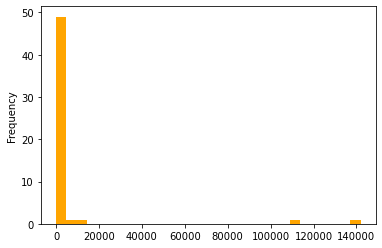

In [44]:
# check how many parking tickets per plate type
plateTypeDF = data_merged.groupby(['Plate Type']).count() # count gives num of non-null elements 
plateTypeDF["Summons Number"].plot.hist(bins=30, color="orange")

In [45]:
plateTypeDF["Summons Number"].sort_values()

Plate Type
VPL         1
SUP         1
SOS         1
OMV         1
NYC         1
CSP         1
NLM         1
FAR         1
HAM         1
STG         2
SEM         2
ORM         2
AGC         2
AYG         3
AMB         3
FPW         3
SCL         6
PHS         7
NYS         9
SPC        10
TRL        11
RGC        12
LMA        16
TRA        17
AGR        18
DLR        23
CHC        27
IRP        27
SRN        27
ORC        32
MCD        35
TOW        36
LMC        37
HIS        38
OML        42
VAS        64
OMR        93
MCL       110
ITP       116
RGL       137
MED       213
SPO       352
ORG       394
CMB       429
TRC       603
OMS       683
MOT      1898
SRF      1988
APP      2628
OMT      5269
LMB      9990
COM    109461
PAS    141920
Name: Summons Number, dtype: int64

<AxesSubplot:xlabel='Plate Type'>

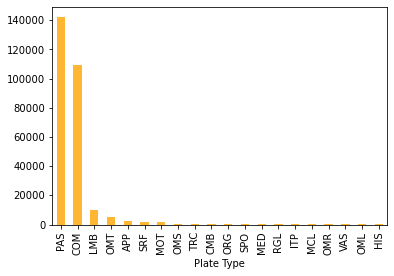

In [46]:
# plot bar graph of plate types
top_20_plates = plateTypeDF["Summons Number"].sort_values(ascending=False).head(20)
top_20_plates.plot.bar(color="orange", alpha=0.8)

We see that passenger vehicles (PAS) get the most tickets and commercial vehicles (COM) get the second to most. It is also not surprising that the tow trucks (TOW) don't even make it into the top 20!

GREAT! Now that we have three identifying features of relative importance, we just need to make sure that they are in usable form for our Logistic Regression model. Because they are of type "object," we will convert the `Vehicle Body Type`, `Registration State`, and `Plate Type` into numerical types in a few cells below. 

### Generating Labels/Target Vector:

#### Considering "Violation Precinct" as a label for a baseline model:

Let us for a brief moment place aside our merged dataset ("data_merged") and consider only the original dataset of ["Parking Violations Issued - Fiscal Year 2022"](https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2022/pvqr-7yc4). If we only had this dataset to build our model, we would need to create a target variable/label that says either 1 or 0 for each row and use that as our target vector for this dataset. We could potentially determine if each row is a 1 or a 0 based on a certain threshold. The following code cells that contain all commented out rows show an initial attempt at generating a label so that we can train the model and then predict the label with new input. This can serve as a baseline model.

Q: When we say an area is a "not good" place to park and that it has a "high parking ticket" frequency, what do we mean by "high"?

A: In order to determine whether or not an area has a "high parking ticket count" or a "low parking ticket count" we will need to choose a threshold as a cut off for either label 1 (a good place to park/low parking ticket count) or label 0 (not a good place to park/high parking ticket count). This way, if the parking ticket count of the area is above the threshold, it is a not good place to park. If the area is below the threshold, it is a good place to park.

We will limit the parameters of an "area" to the precinct in which the alleged parking violation occurred, using the feature of our dataframe called `Violation Precinct`.

In [47]:
## For each precinct count how many violations occurred.
#precinct_baselineDF = data.groupby(["Violation Precinct"]).count() 
#precinct_baselineDF = precinct_baselineDF.iloc[1:] ## exclude rows where the precinct value is 0 

#precinct_baselineDF

In [48]:
## plot the count of parking tickets per precinct with x axis as number of counts. 
## Frequency (y axis) is number of precincts that had within that range of counts.
#precinct_baselineDF["Summons Number"].plot.hist(bins=20)

The x axis shows the number of violations in the precincts. Few precincts have no violations and many have many violations. Let us say that the cut off is 6000. 
For every element in the dataFrame:
If this is in a precinct that is above 6000, then it is a not good place to park (0). If it is in a precinct whose count is below 6000 then it is a good place to park (1). Store these labels in a target vector!

We will now generate the target vector!

In [49]:
## array of count by summons num (sum of parking tickets in that precinct)
#summonsNumCount = precinct_baselineDF["Summons Number"].values 

## array of violation precincts
#violationPrecincts = precinct_baselineDF.index

In [50]:
## dictionary maps 0 or 1 to each precinct, depending on above or below the threshold
#precinctDict = {} 
#threshold = 6000


#for i in range(len(summonsNumCount)):
#   precinct = violationPrecincts[i]
#   if summonsNumCount[i] <= threshold: ## if num of parking tickets is below 6000:
#       precinctDict[precinct] = 1      ## it is a good place to park
       
#    else:
#       precinctDict[precinct] = 0      ## otherwise, not good place to park
        
        
#print(precinctDict)
#print(len(precinctDict) == len(summonsNumCount) == len(violationPrecincts)) ## account for all values 

In [51]:
## drop all rows in dataset whose precinct is 0
#data = data[data["Violation Precinct"] != 0]

#y_baseline = [] ## target vector (array to hold label for each row)

#for index, row in data.iterrows():           ## for each row in dataframe,
#   precinct = row["Violation Precinct"]            ## select its precinct
#   y_baseline.append(precinctDict[precinct])       ## append 0 or 1 depending on value mapped to the precinct
    
#len(y_baseline) == len(data) ## account for all values

# III. Overview of Model, How it Works, Relevant Metrics
### In this section we will build and train a  Logistic Regression model to act as a binary classifier.

In [52]:
from sklearn.model_selection import train_test_split

# split data into target variable (y) and feature matrix (X) [explicitly select features to include in model]
y = data_merged["Violation Status"]
X = data_merged[["Issue Month", "Issue Day of Week", "Hour", 
                 "Violation County", "isNY", "Violation Precinct",
                 "Vehicle Body Type", "Plate Type"]]

# split data and labels into train and test sets (prior to preprocessing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10)

In [53]:
numerical_features = ['Issue Month', 'Issue Day of Week', 'Hour']
categorical_features = ['isNY', 'Vehicle Body Type', 'Plate Type', 'Violation Precinct', 'Violation County']

In [54]:
# Pipeline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression

# Numeric transformer: normalize inputs and dimensionality reduction
numeric_transformer = Pipeline(
    steps=[('scale', StandardScaler(with_mean=False)), ('ipca',  IncrementalPCA())]
)

# categorical transformer 
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# preprocess numerical and categorical data
preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numerical_features),
            ("cat", categorical_transformer, categorical_features),
        ])

In [55]:
# Add binary classifier to pipeline to complete prediction pipeline
clf = Pipeline(
    steps=[('preprocessor', preprocessor), ("classifier", LogisticRegression(random_state=0, max_iter=1000))]
)

# train/fit the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler(with_mean=False)),
                                                                  ('ipca',
                                                                   IncrementalPCA())]),
                                                  ['Issue Month',
                                                   'Issue Day of Week',
                                                   'Hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['isNY', 'Vehicle Body Type',
                                                   'Plate Type',
                                                   'Violation Precinct',
      

In [56]:
# use model to predict on new feature matrix
clf.predict(X_test)

# scrore by accuracy 
clf.score(X_test, y_test)

0.8290565542005124

# IV. Data Visualization
### This section includes at least one data visualization either of my input data or the output data of my model which is relevant to the project objectives.


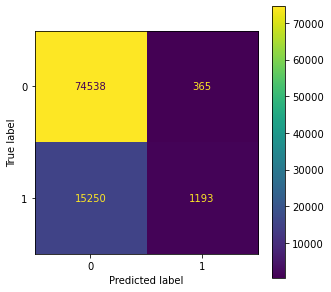

In [57]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, clf.predict(X_test))).plot(ax=ax)

Let's review the outputs of the model's prediction: a 1 means the driver is in a good place to park his car and a 0 means he is in a not so good place to park his car and, therefore, might want to consider looking for parking elsewhere. 

The above Confusion Matrix shows that the model predicts more than triple the amount of <b>true positives</b> than it does <b>false positives</b>. Practically, this means that among the times that the model predicted that a place would be a good place to park, it was correct more than triple the amount of times that it was not correct! Furthermore, we can see that there are more than four times the amount of <b>true negatives</b> than there are <b>false negatives</b>. That is, among the the times that the model predicted that an area was not a good place to park, it was correct more than four times the amount of times that it was not correct! 

It is great that the model is correct more often than it is not. We also note the impressive ratio of <b>false positives</b> to <b>false negatives</b>. While having to drive around New York City in search of a parking spot is often a time consuming endeavor (and a great way to work on patience!), the expense of receiving a ticket for a parking violation is often more costly than the former. Therefore, most people would much rather have a model incorrectly predict that an area is not good for parking than have one incorrectly predict that it is good!  This model does just that! (<i>And if one would rather pay a parking ticket than having to spend more time looking for parking, a good bit of advice would be to save money and just place the car in one of New York City's many parking lots!)</i>

Text(0.5, 0, 'threshold')

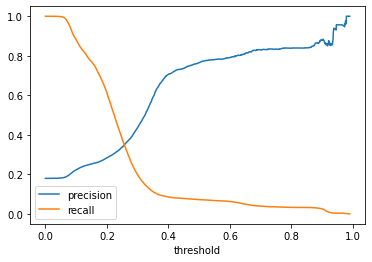

In [58]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
import numpy as np

thresholds = np.linspace(.00001, .99, 1000)
proba = clf.predict_proba(X_test)[:, 1]
precs =  [precision_score(y_test, (proba > threshold).astype(int))
               for threshold in thresholds]

recs = [recall_score(y_test, (proba > threshold).astype(int))
               for threshold in thresholds]
plt.plot(thresholds, precs, label='precision')
plt.plot(thresholds, recs, label='recall')
plt.legend()
plt.xlabel('threshold')

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     74903
           1       0.77      0.07      0.13     16443

    accuracy                           0.83     91346
   macro avg       0.80      0.53      0.52     91346
weighted avg       0.82      0.83      0.77     91346



As noted above, it is important that the model is correct when predicting that a certain place is good for parking for a given vehicle; otherwise, one risks paying an expensive parking ticket. The precision-recall score relates that the <b>precision</b> for negatives/0 (0.83) and positives/1 (0.77) is quite high, which indicates that the model is usually correct when it predicts that a place is a good or not good place to park! An observation of the <b>recall</b> shows that the recall for negatives/0 is 1.00, while it is quite low for positives/1 (0.07). This is an appropriate  recall score for this specific case of parking violations, as we are generally more concerned with preventing someone from parking in a not good spot than finding all of the good parking spots in New York City. As for the <b>f1-score</b>, we can look to this as a balance of precision and recall. 

# V. Interactivity 

### Welcome to the interactive section! Please input variables into the notebook, run the model, and view the prediction!

- Input enough information to put in one example (row) of a dataset
- Input the following features: 
         "Issue Month", "Issue Day of Week", "Hour", 
         "Violation County", "isNY", "Violation Precinct",
         "Vehicle Body Type", "Plate Type"

In [60]:
import ipywidgets as widgets

# Issue Month (received as int)
month = widgets.Dropdown(
    options=[('January', 1), ('February', 2), ('March', 3), ('April', 4), ('May', 5), ('June', 6), ('July', 7), 
             ('August', 8), ('September', 9), ('October', 10), ('November', 11), ('December', 12)],
    value=2,
    description='Month:')

In [61]:
# Issue Day of Week (received as int)
day = widgets.Dropdown(
    options=[('Monday', 0), ('Tuesday', 1), ('Wednesday', 2), ('Thursday', 3), ('Friday', 4), 
            ('Saturday', 5), ('Sunday', 6)],
    value=0,
    description='Day of Week:')

In [62]:
# Hour
hour = widgets.BoundedIntText(
    value=0,
    min=0,
    max=23,
    step=1,
    description='Hour (0-23):',
    disabled=False)

In [63]:
# Violation County
county = widgets.Dropdown(
        options=[('Manhattan', 'MN'), ('Queens', 'QN'), ('Bronx', 'BX'), ('Staten Island', 'ST'), ('Brooklyn', 'BK')],
        value='MN',
        description ='Borough:')

# error workaround
with county.hold_trait_notifications():
    county.options=[('Manhattan', 'MN'), ('Queens', 'QN'), ('Bronx', 'BX'), 
                    ('Staten Island', 'ST'), ('Brooklyn', 'BK')]

In [64]:
# layout
style = {'description_width': 'initial'}

# Is NY
isNY = widgets.Dropdown(
    options=[('NY', True), ('Other', False)],
    value=0,
    description ='Registration State:', style=style)

# error workaround
with isNY.hold_trait_notifications():
    isNY.options=[('NY', True), ('Other', False)]


In [65]:
# Violation Precinct (received as int)
precinct = widgets.Text(placeholder='Type your current precinct here', description='Precinct #:', disabled=False)

In [66]:
# Vehicle Body Type
body = widgets.Combobox(
    placeholder='Enter Vehicle Body Type',
    options=['TRA', 'DELV', 'SUBN', 'VAN', 'SDN', 'FOUR', '4DSD', 'TOW',
       '2DSD', 'TRAC', 'PICK', 'MCY', 'TAXI', 'SEDN', 'UTIL', 'MOPD',
       'TRLR', 'DUMP', 'CONV', 'REFG', 'TR/C', 'FLAT', 'LIM', 'MCC',
       'TANK', 'MOBL', 'BUS', 'SEMI', 'N/S', 'BOAT', 'RD/S', 'T/CR',
       'P/SH', 'POLE', 'STAK', 'TR/E', 'SWT', 'CUST', 'LTRL', 'R/RD',
       'H/WH', 'SUV', 'P-U', 'RV', 'ATV', 'TRAV', 'FPM', 'WSR'],
    description='Vehicle Body Type:', style=style,
    ensure_option=True,
    disabled=False)

In [67]:
# Plate Type
plate = widgets.Combobox(
    placeholder='Enter Plate Type',
    options=[ 'COM', 'PAS','OMT', 'ORG', 'TOW', 'SRF', 'RGL', 'MOT',
       'APP', 'LMB', 'MED', 'SPO', 'HIS', 'ITP', 'OML', 'DLR', 'OMS',
       'TRC', 'AGC', 'TRA', 'AMB', 'CMB', 'PHS', 'MCL', 'SRN', 'OMR',
       'ORC', 'TRL', 'SPC', 'MCD', 'CHC', 'LMA', 'IRP', 'LMC', 'VAS',
       'STG', 'AYG', 'RGC', 'SCL', 'VPL', 'NYS', 'ORM', 'SOS', 'AGR',
       'CSP', 'SEM', 'FPW', 'NYC', 'FAR', 'NLM', 'HAM', 'OMV', 'SUP'],
    description='Plate Type:',
    ensure_option=True,
    disabled=False
)

In [68]:
# Display widget
out = widgets.Output(layout={'border': '1px solid black'})

with out: 
    display(month, day, hour, county, isNY, precinct, body, plate)
    
print("Please input the following information:")
out

Please input the following information:


Output(layout=Layout(border='1px solid black'))

In [69]:
month    =    month.value
day      =      day.value
hour     =     hour.value
county   =   county.value
isNY     =     isNY.value
precinct = precinct.value
body     =     body.value
plate    =    plate.value


print(month, day, hour, county, isNY, precinct, body, plate)

7 6 10 MN False 33 SUBN PAS


In [70]:
# Enter user input into model 
userDF = pd.DataFrame({"Issue Month": month, "Issue Day of Week": day, "Hour": hour,
                         "Violation County": county, "isNY": isNY, "Violation Precinct": precinct, 
                         "Vehicle Body Type": body, "Plate Type": plate}, index=[0])

# predict
prediction = clf.predict(userDF)
prediction

array([0])

In [71]:
with out:
    output = out.append_stdout("If the prediction is 0, this is not a good place to park. If it is\
 1, this is a good place to park.\n Your prediction is:" + str(prediction[0]))